In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import numpy as np
import csv
import matplotlib.cm as cm
import math

['BLCA', 'BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRP', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV', 'PRAD', 'SARC', 'STAD', 'THCA', 'UCEC']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


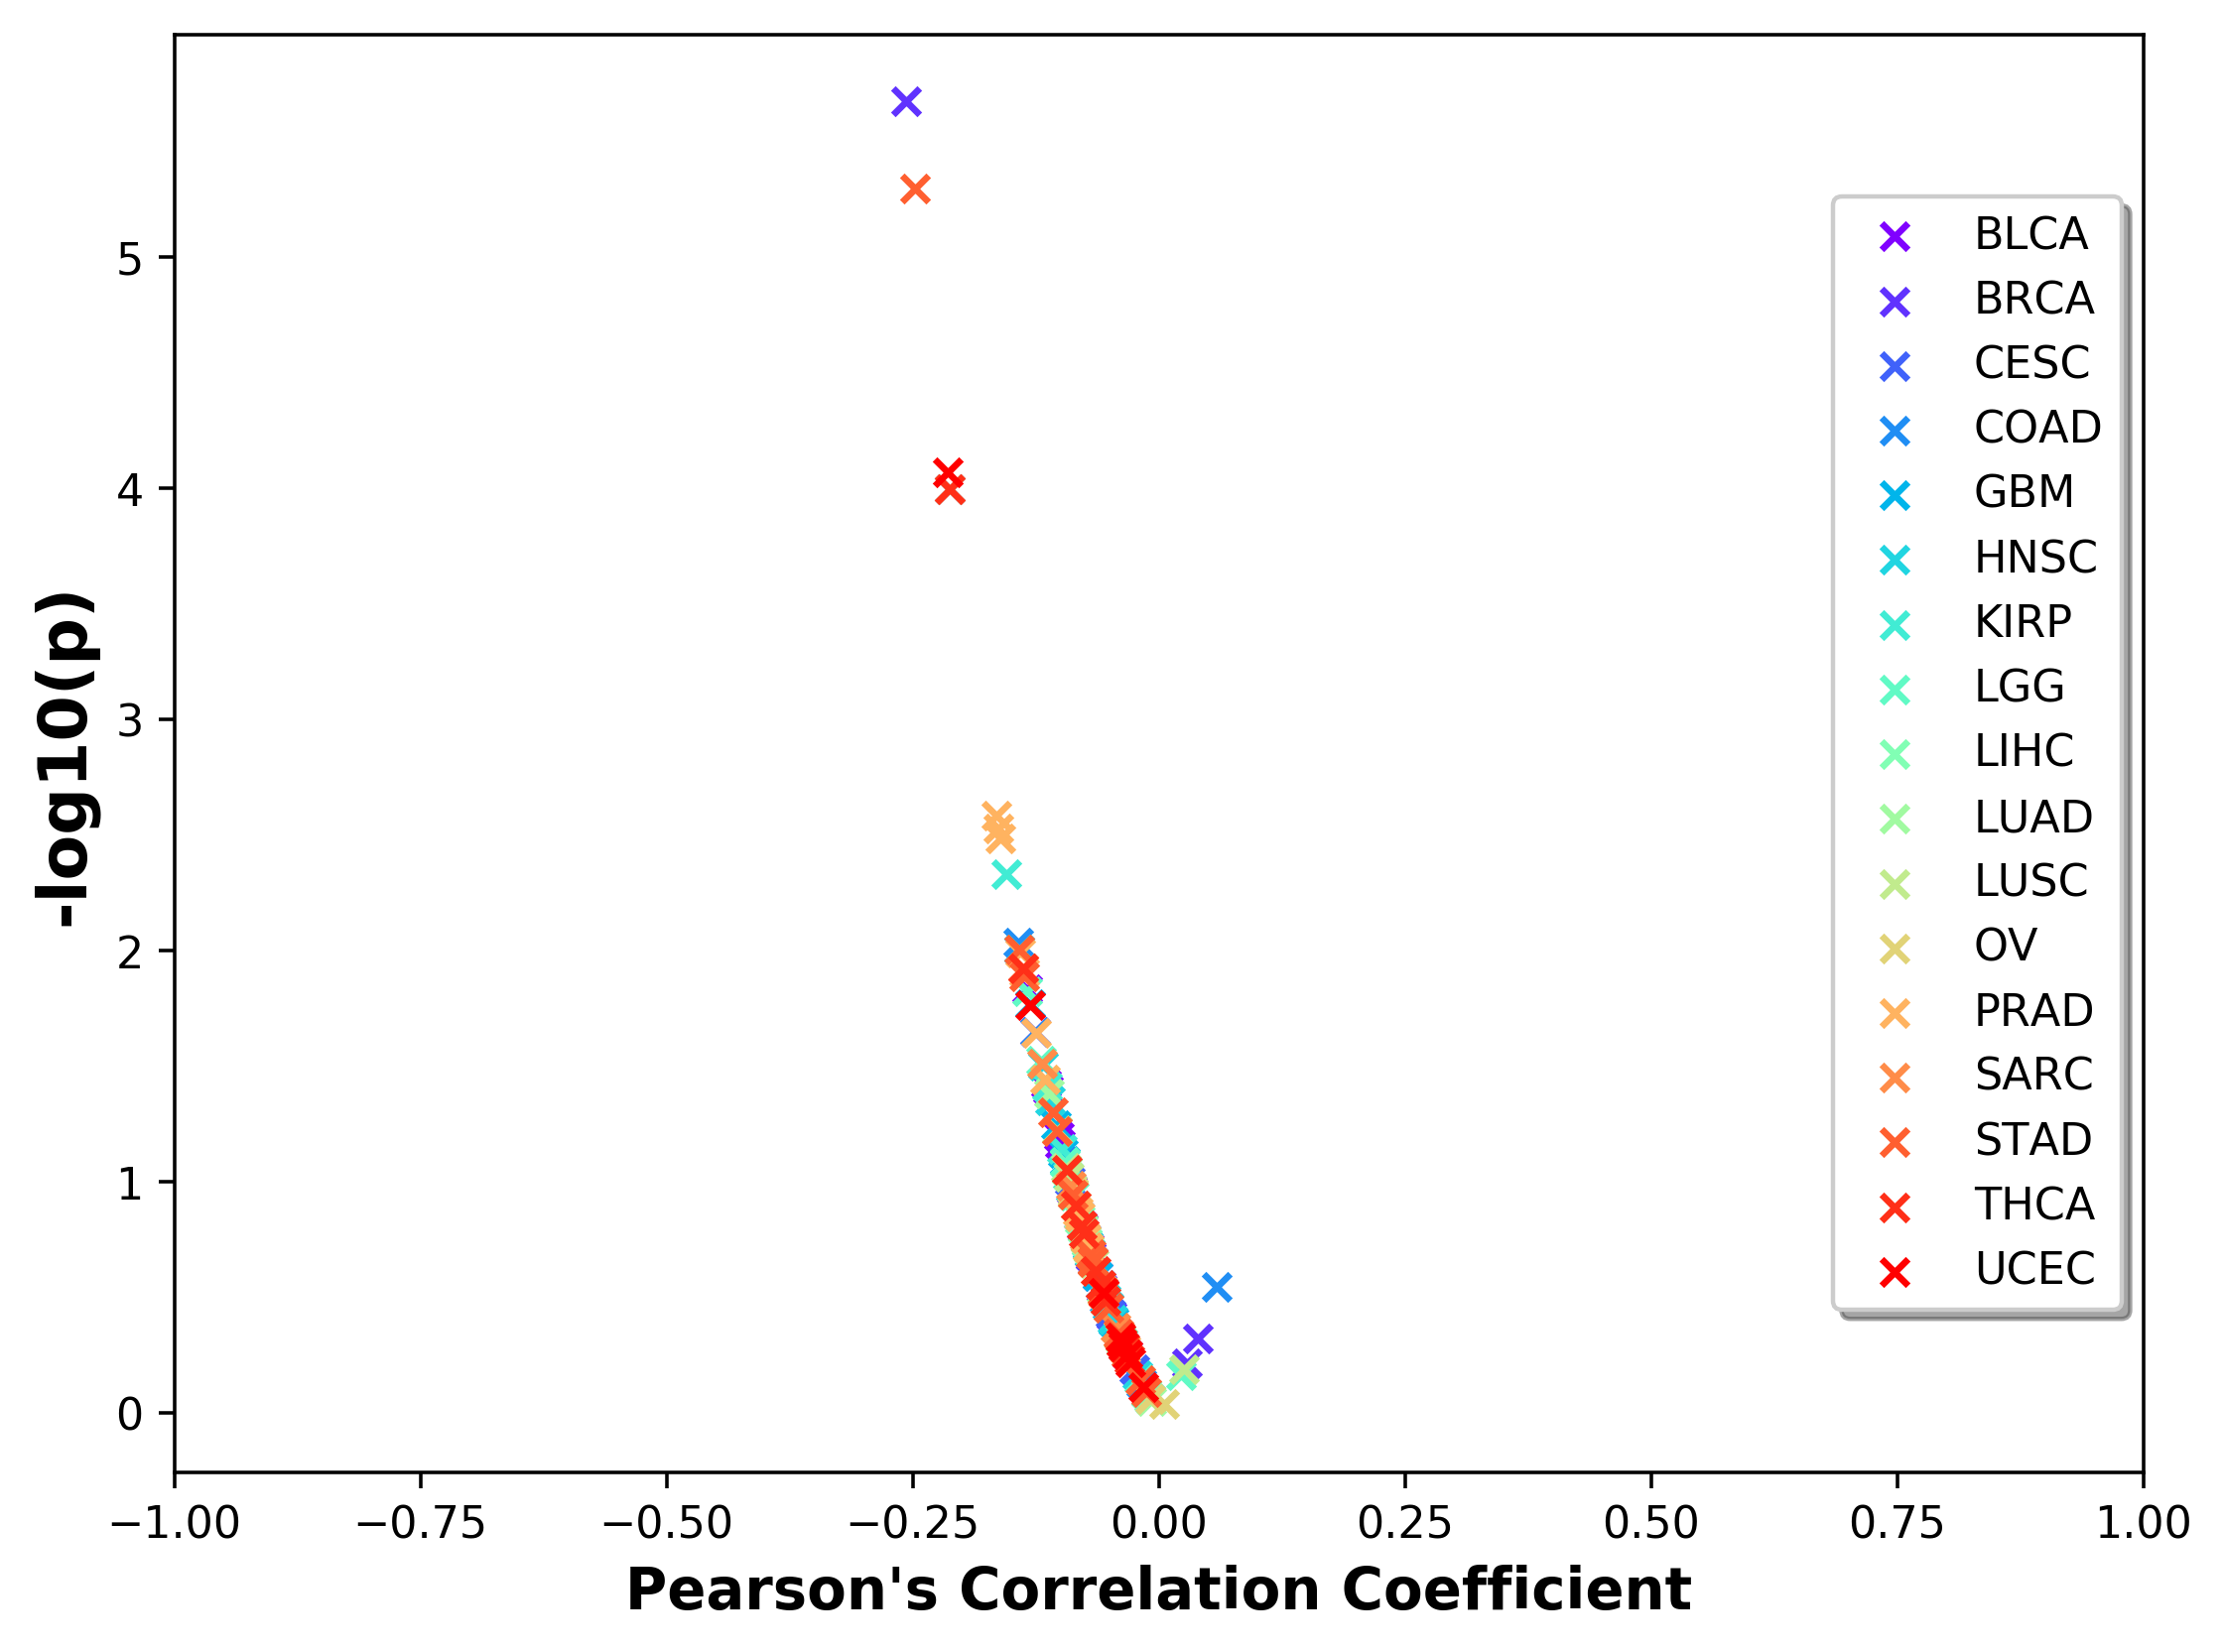

In [17]:
directory = "/Users/sajal/multihit/PART1/correlation/ACC2HIT"
cancers = []
with open(directory + "/cancers.txt", "r") as reader:
    for line in reader:
        cancers.append(line.strip())
print(cancers)

fig = plt.figure(1, figsize=(8, 6), dpi=320)
ax0 = fig.add_subplot(1, 1, 1)
colors = cm.rainbow(np.linspace(0, 1, len(cancers)))
i = 0
ax = plt.subplot(1,1,1)
for cancer in cancers:
    with open(directory + "/" + cancer + "-combinations-corr-normal.csv", "r") as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        corrs = []
        pvals = []
        for row in reader:
            corr = row[2]
            pval = row[3]
            if(corr == "nan" or pval == "nan"):
                continue
            corrs.append(float(corr))
            pvals.append(-math.log(float(pval), 10))
        handle = plt.scatter(corrs, pvals, label=cancer, color=colors[i], marker="x")
        i += 1

plt.xlim([-1.0, 1.0])
#plt.title("Normal Samples", loc="left")
plt.xlabel("Pearson's Correlation Coefficient", fontweight="bold", fontsize=13)
plt.ylabel("-log10(p)", fontweight="bold", fontsize=15)



h, l = ax.get_legend_handles_labels()
ax.legend(h, l, loc='center right', bbox_to_anchor=(1.0, 0.5),
          ncol=1, fancybox=True, shadow=True)

#plt.tight_layout()
#plt.subplots_adjust(bottom=0.13, left=0.1, right=0.95)

#fig.text(0.30, 0.02, "Normal Samples", fontsize=13, ha='center', va='center')
#fig.text(0.75, 0.02, "Tumor Samples", fontsize=13, ha='center', va='center')
#fig.text(0.05, 0.5, "-log10(p)", ha='center', fontsize=20, va='center', rotation='vertical')

fig.savefig("correlation-normal.pdf")